In [8]:
import numpy as np
from keras.datasets import imdb
from matplotlib import pyplot

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true, # load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

# Let Us observe Data for Some choices to be Made 

In [14]:
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [12]:
X_train.shape

(25000,)

In [21]:
X_test.shape

(25000,)

In [13]:
X.shape

(50000,)

In [15]:
y.shape

(50000,)

In [19]:
np.unique(y)

array([0, 1], dtype=int64)

In [20]:
# Summarize number of Unique words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
9998


In [39]:
numpy.hstack(X[0])

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [28]:
Data = numpy.hstack(X)

In [30]:
Data

array([   1,   14,   22, ...,   34, 2005, 2643])

In [43]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print(len(result))
print(result)

Review length: 
50000
[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171, 158, 145, 790, 258, 287, 67, 123, 975, 775, 236, 195, 274, 214, 91, 1038, 815, 183, 206, 50, 118, 147, 141, 60, 56, 439, 439, 213, 144, 533, 303, 203, 563, 129, 153, 55, 92, 174, 187, 183, 165, 78, 198, 156, 223, 127, 61, 362, 84, 57, 176, 159, 57, 159, 165, 213, 194, 149, 130, 203, 19, 98, 466, 525, 130, 322, 153, 408, 215, 472, 143, 136, 354, 260, 319, 125, 209, 282, 810, 142, 240, 148, 198, 193, 123, 128, 103, 479, 345, 263, 165, 205, 333, 184, 92, 177, 335, 120, 121, 259, 180, 

In [47]:
'''We can see that the average review has just under 300 words with a standard deviation of just over 200 words.'''
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))

Mean 234.76 words (172.911495)


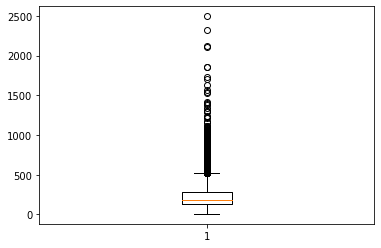

In [48]:
'''Looking a box and whisker plot for the review lengths in words, we can probably see an exponential distribution
that we can probably cover the mass of the distribution with a clipped length of 400 to 500 words.'''
# plot review length
pyplot.boxplot(result)
pyplot.show()

# Now Work on Data 

In [49]:
# NLP for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
''' Keras provides a convenient way to convert positive integer representations
of words into a word embedding by an Embedding layer.'''


'''The layer takes arguments that define the mapping including the maximum number of expected words 
also called the vocabulary size (e.g. the largest integer value that will be seen as an integer).
The layer also allows you to specify the dimensionality for each word vector, called the output dimension.'''


'''Let’s say that we are only interested in the first 5,000 most used words in the dataset. 
Therefore our vocabulary size will be 5,000. We can choose to use a 32-dimension vector to represent each word.
Finally, we may choose to cap the maximum review length at 500 words, truncating reviews longer
than that and padding reviews shorter than that with 0 values.'''

In [52]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# restore np.load for future normal usage
np.load = np_load_old


In [53]:
'''We would then use the Keras utility to truncate or pad the dataset to a length of 500
for each observation using the sequence.pad_sequences() function'''
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [54]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)




Train on 25000 samples, validate on 25000 samples
Epoch 1/2





25000/25000 [==============================] - 47s 2ms/step - loss: 0.5086 - acc: 0.7128 - val_loss: 0.3219 - val_acc: 0.8596
Epoch 2/2
25000/25000 [==============================] - 47s 2ms/step - loss: 0.1905 - acc: 0.9272 - val_loss: 0.3002 - val_acc: 0.8731


In [56]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

25000/25000 [==============================] - ETA:  - 18s 708us/step
Accuracy: 87.31%


# How to Prepare Text Data for Deep Learning with Keras 

In [ ]:
'''You cannot feed raw text directly into deep learning models.

Text data must be encoded as numbers to be used as input or output for machine learning and deep learning models.

The Keras deep learning library provides some basic tools to help you prepare your text data'''

'''Keras provides the text_to_word_sequence() function that you can use to split text into a list of words.

By default, this function automatically does 3 things:

Splits words by space (split=” “).
Filters out punctuation (filters=’!”#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n’).
Converts text to lowercase (lower=True).'''

In [57]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


In [ ]:
'''Keras provides the one_hot() function that you can use to tokenize and integer encode a text document in one step. 
The name suggests that it will create a one-hot encoding of the document, which is not the case.'''
'''As with the text_to_word_sequence() function in the previous section,
the one_hot() function will make the text lower case, filter out punctuation, and split words based on white space.'''


In [ ]:
'''In addition to the text, the vocabulary size (total words) must be specified. This could be the total number of words
in the document or more if you intend to encode additional documents that contains additional words. 
The size of the vocabulary defines the hashing space from which words are hashed. 
Ideally, this should be larger than the vocabulary by some percentage (perhaps 25%) to minimize the number of collisions. 
By default, the ‘hash’ function is used, although as we will see in the next section,
alternate hash functions can be specified when calling the hashing_trick() function directly..'''


'''We can use the text_to_word_sequence() function from the previous section to split the document 
into words and then use a set to represent only the unique words in the document. The size of this set
can be used to estimate the size of the vocabulary for one document.'''


In [58]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text)) #As set so we are taking only unique values
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = one_hot(text, round(vocab_size*1.3))
print(result)

8
[2, 6, 9, 5, 6, 9, 2, 8, 7]


In [59]:
'''A limitation of integer and count base encodings is that they must maintain a vocabulary of words and their 
mapping to integers.
An alternative to this approach is to use a one-way hash function to convert words to integers.
This avoids the need to keep track of a vocabulary, which is faster and requires less memory.
Keras provides the hashing_trick() function that tokenizes and then integer encodes the document,
just like the one_hot() function. It provides more flexibility, allowing you to specify the hash 
function as either ‘hash’ (the default) or other hash functions such as the built in md5 function or your own function.'''
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = hashing_trick(text, round(vocab_size*1.3), hash_function='md5')
print(result)

8
[6, 4, 1, 2, 7, 5, 6, 2, 6]


In [ ]:
'''Other Than this there is Tokenizer API'''
